In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def show_img(imagen_np, title=""):
    plt.imshow(imagen_np, cmap='gray', vmin=0, vmax=255)
    plt.title(title)
    plt.axis('off')
    plt.show()

#Ejercicio 1: Negativo y transformación

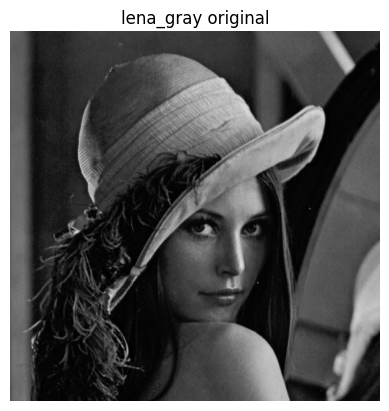

In [ ]:
imagen = cv2.imread('lena_gray.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(imagen, cmap='gray', vmin=0, vmax=255)
plt.title("lena_gray original")
plt.axis('off')
plt.show()

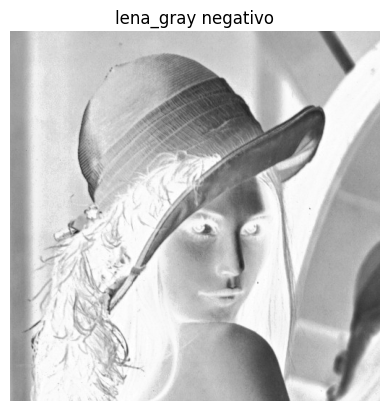

In [ ]:
negativo = 255 - imagen
plt.imshow(negativo, cmap='gray', vmin=0, vmax=255)
plt.title("lena_gray negativo")
plt.axis('off')
plt.show()

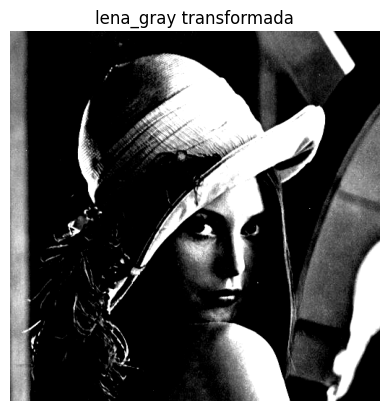

In [ ]:
imagen_float = imagen.astype(np.float32) / 255.0

imagen_transformada = (imagen_float - 0.25) / (0.5 - 0.25)
imagen_transformada = np.clip(imagen_transformada, 0, 1)
imagen_transformada = (imagen_transformada * 255).astype(np.uint8)

plt.imshow(imagen_transformada, cmap='gray', vmin=0, vmax=255)
plt.title("lena_gray transformada")
plt.axis('off')
plt.show()

# Ejercicio 2

El mejor resultado se obtuvo de aplicar primero una inversión a la imagen, y luego una transformación cúbica de la misma, centrada en un punto $\gamma$ que se fue seleccionando hasta encontrar el mejor resultado. La expresión genérica de la transformación es:

$$T_3(r) = \frac{\left(r-\gamma\right)^3}{\gamma^2}+\gamma $$

La cual se puede ver en la siguiente figura ($\gamma=0.28$)):

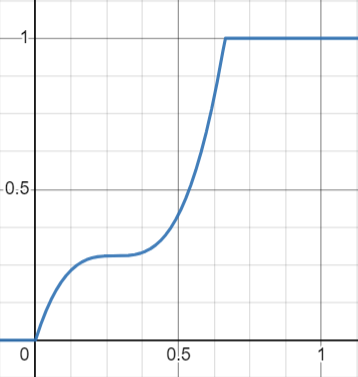

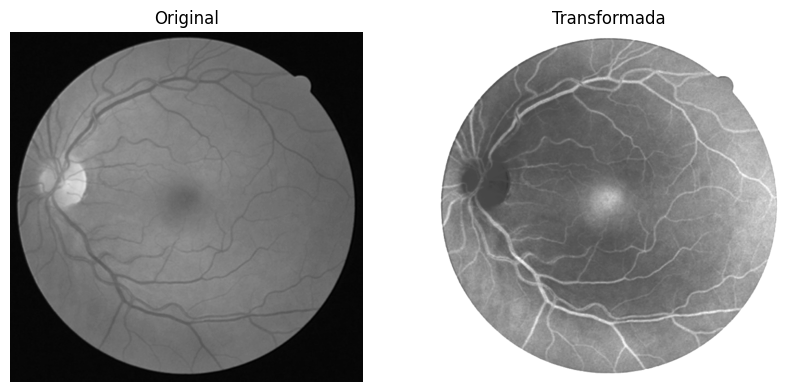

In [ ]:
# Cargamos la imagen
image = cv2.imread('eyebw.jpg', cv2.IMREAD_GRAYSCALE)

# Mostramos la imagen original
plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
plt.title("Original")
plt.axis('off')
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

# Hacemos las transformaciones

# Inversion de color
image2 = 255 - image

# Transformación cúbica, centrada en gamma=0.28
gamma= 0.28
image2 = 255*((image2/255. - gamma)**3/(gamma**2) + gamma)

# Clip para quedar en el rango [0-255]
image2 = np.clip(image2, 0, 255)
image2 = np.uint8(image2)

# Mostramos la imagen modificada
plt.subplot(1,2,2)
plt.title("Transformada")
plt.axis('off')
plt.imshow(image2, cmap='gray', vmin=0, vmax=255)
plt.show()

# Ejercicio 3: Bit Plane Slicing


In [ ]:
import cv2
import numpy as np

In [ ]:
getBitPlanes = lambda image: [(image & (1 << i)) for i in range(8)]

In [ ]:
def showBitPlane(planes):
  fig, axs = plt.subplots(2, 4, figsize=(12, 6))

  for i, plano in enumerate(planes):
    fil = i // 4
    col = i % 4
    axs[fil, col].imshow(plano, cmap='gray')
    axs[fil, col].set_title(f'Plano de Bits {i}')
    axs[fil, col].axis('off')

  plt.tight_layout()
  plt.show()

## Inciso a

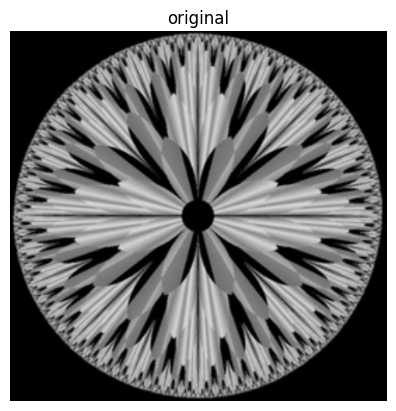

In [ ]:
fractal = cv2.imread('fractal.png', 0)
show_img(fractal, "original")

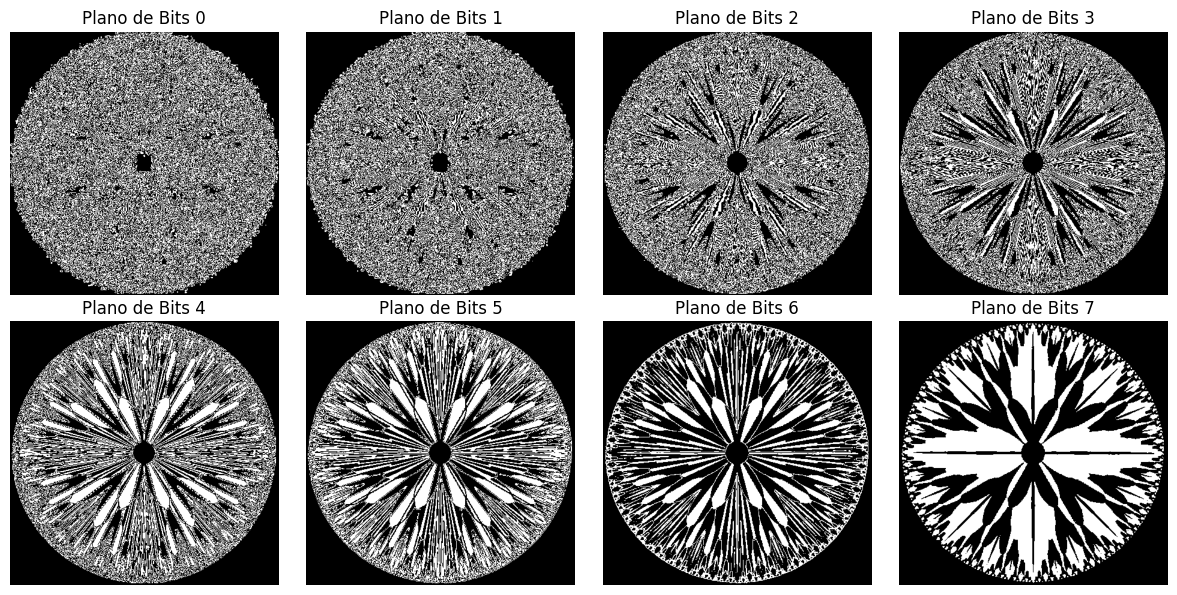

In [ ]:
arr_planos = getBitPlanes(fractal)
showBitPlane(arr_planos)

## Inciso b

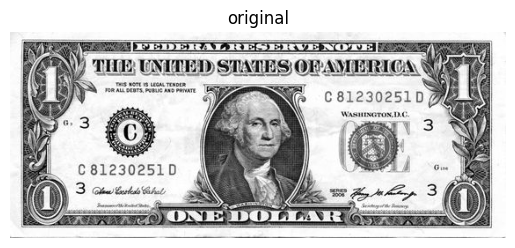

In [ ]:
dollar = cv2.imread('onedollar.jpg', 0)
show_img(dollar, "original")

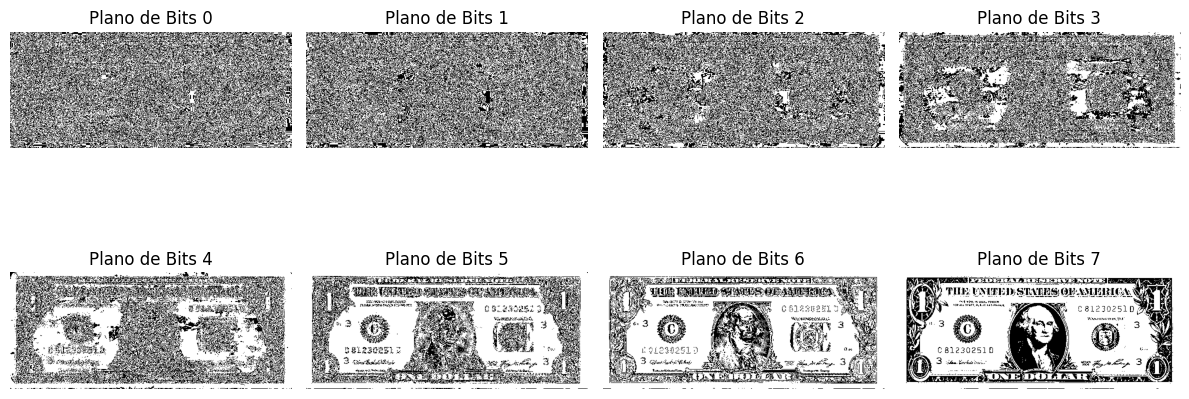

In [ ]:
dollar_planos = getBitPlanes(dollar)
showBitPlane(dollar_planos)

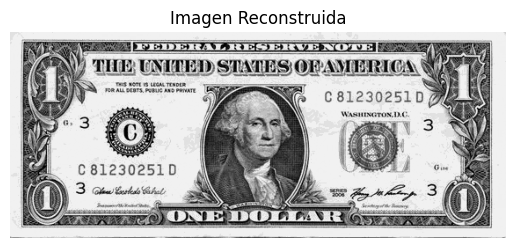

In [ ]:
planos_sel = [1,5,6,7,8]

rec_img = np.zeros(dollar.shape)

for plano in planos_sel:
  rec_img = rec_img + dollar_planos[plano-1]

show_img(rec_img, "Imagen Reconstruida")

#Ejercicio 4: Histograma

Un histograma de una imagen es una representación gráfica que muestra la distribución de los niveles de gris o colores presentes en esa imagen, es decir que nos permite ver cuántas veces aparece cada valor de intensidad en la imagen.

La imagen se divide en L niveles de gris (o L colores en el caso de una imagen en color), y el histograma cuenta cuántos píxeles o puntos de la imagen tienen cada uno de esos niveles de intensidad. Matemáticamente, esto se representa como $h(r_k) = n_k$, donde $r_k$ es uno de los L niveles de gris (por ejemplo, en una imagen en escala de grises, $r_k$ podría variar de 0 a 255 en una imagen de 8 bits) y $n_k$ es la cantidad de puntos en la imagen que tienen ese valor de intensidad $r_k$.

Para que sea mas simple de comparar entre diferentes imágenes, es común normalizarlo dividiendo cada componente por el número total de puntos en la imagen, lo que se representa como $p(r_k) = n_k/n$, donde $p(r_k)$ es la probabilidad de que un punto de la imagen tenga el valor de intensidad $r_k$.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from PIL import Image, ImageDraw

import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_normalized_histogram(image, name):
    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

    histogram /= histogram.sum() #Normalización

    niveles_de_gris = np.arange(256)
    fig, ax = plt.subplots()
    ax.plot(niveles_de_gris, histogram, color='black', linewidth=2)
    ax.fill_between(niveles_de_gris, histogram.flatten(), color='black', alpha=0.8)
    ax.set_xlabel('Nivel de Gris')
    ax.set_ylabel('Frecuencia Normalizada')
    ax.set_title('Histograma de ' + name)
    ax.set_xlim([0, 255])
    plt.show()

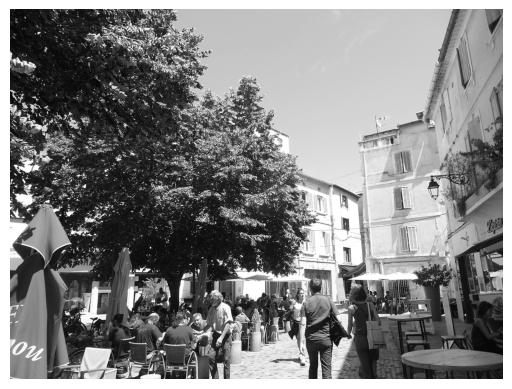

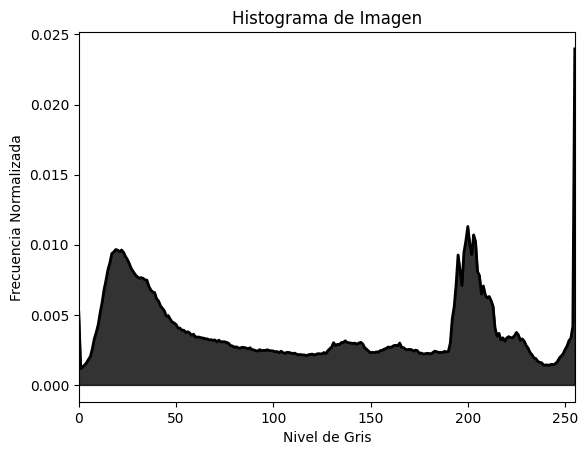

In [ ]:
imagen = cv2.imread('histograma.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(imagen, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()
plot_normalized_histogram(imagen, 'Imagen')

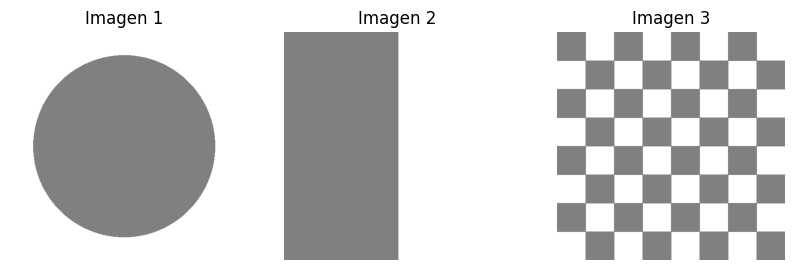

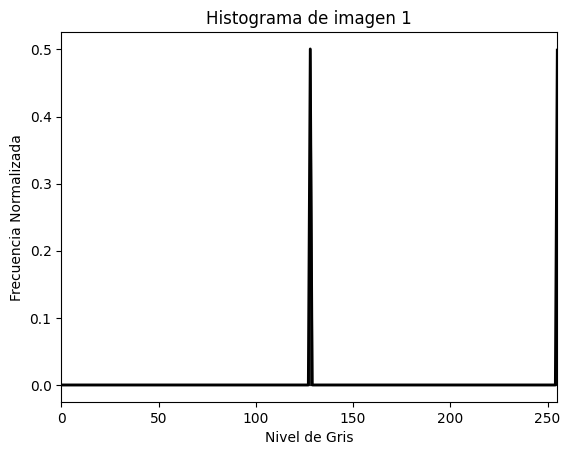

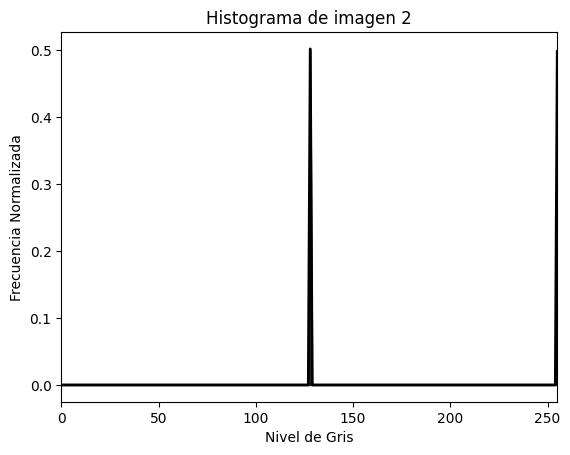

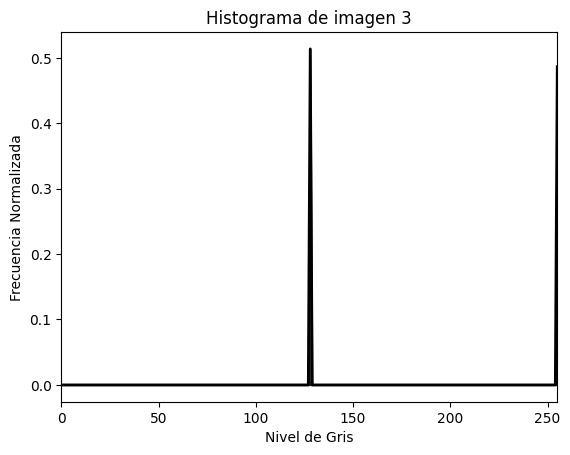

In [ ]:
width, height = 512, 512

# Imagen 1 - Círculo gris en el centro
area_total = width * height

# Calcular el radio del círculo para que el área gris sea igual a la mitad del área total
radio = int(math.sqrt(area_total / 2 / math.pi))

# Imagen 1 - Círculo gris en el centro
imagen1 = Image.new("RGB", (width, height), "white")
dibujo1 = ImageDraw.Draw(imagen1)
centro = (width // 2, height // 2)
dibujo1.ellipse((centro[0] - radio, centro[1] - radio, centro[0] + radio, centro[1] + radio), fill="gray")

# Imagen 2 - Mitad blanca y mitad gris
imagen2 = Image.new("L", (width, height), "white")
dibujo2 = ImageDraw.Draw(imagen2)
mitad_ancho = width // 2
dibujo2.rectangle([0, 0, mitad_ancho, height], fill="gray")

# Imagen 3 - Tablero de ajedrez en blanco y gris
imagen3 = Image.new("L", (width, height), "white")
dibujo3 = ImageDraw.Draw(imagen3)
tamano_cuadrado = width // 8

for fila in range(8):
    for columna in range(8):
        if (fila + columna) % 2 == 0:
            dibujo3.rectangle(
                [columna * tamano_cuadrado, fila * tamano_cuadrado, (columna + 1) * tamano_cuadrado, (fila + 1) * tamano_cuadrado],
                fill="gray")

plt.figure(figsize=(10, 4))

plt.subplot(131)
plt.imshow(imagen1)
plt.axis('off')
plt.title("Imagen 1")

plt.subplot(132)
plt.imshow(imagen2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Imagen 2")

plt.subplot(133)
plt.imshow(imagen3, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Imagen 3")

plt.show()

plot_normalized_histogram(np.array(imagen1), 'imagen 1')
plot_normalized_histogram(np.array(imagen2), 'imagen 2')
plot_normalized_histogram(np.array(imagen3), 'imagen 3')

Si bien la distribución de los pixeles es distinta en cada imagen, las 3 imágenes tienen las mismas estadísticas, lo cual se puede visualizar en los histogramas que son iguales.

#Ejercicio 5: Ecualización de histograma


La ecualización de histograma es una técnica utilizada para mejorar el contraste en una imagen al redistribuir las intensidades de los píxeles. Su principal objetivo es mejorar la visualización de detalles y características en una imagen que pueden estar ocultas o poco distinguibles debido a un mal contraste.

El proceso de ecualización de histograma implica redistribuir las intensidades de los píxeles de modo que la distribución de intensidades sea más uniforme en todo el rango disponible. Esto se logra mediante una transformación de la función de distribución acumulativa del histograma original. Como resultado, las áreas de la imagen que antes eran demasiado oscuras o demasiado claras se ajustan para que sean más perceptibles, lo que mejora significativamente la calidad visual de la imagen.

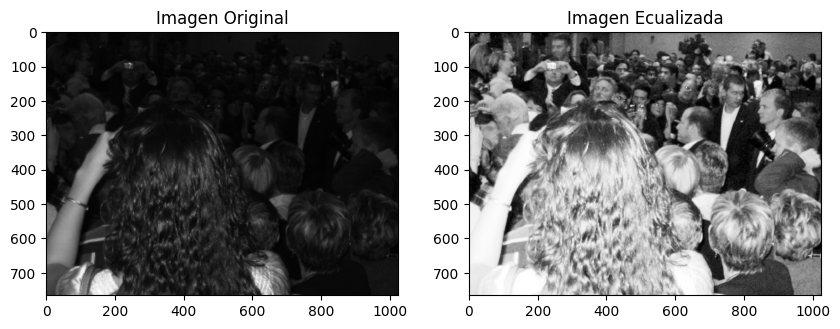

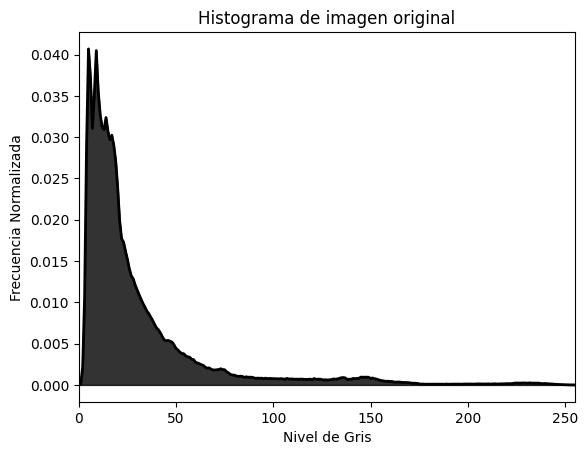

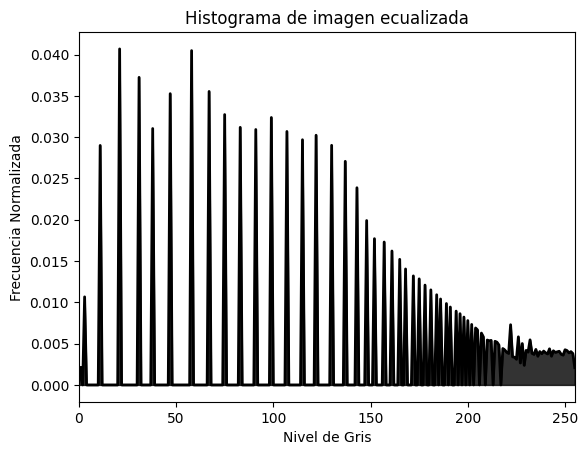

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('eq_hist.png', cv2.IMREAD_GRAYSCALE)

imagen_ecualizada = cv2.equalizeHist(imagen)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')

plt.subplot(1, 2, 2)
plt.imshow(imagen_ecualizada, cmap='gray')
plt.title('Imagen Ecualizada')
plt.show()

plot_normalized_histogram(np.array(imagen), 'imagen original')
plot_normalized_histogram(np.array(imagen_ecualizada), 'imagen ecualizada')

# Ejercicio 6: Brillo y contraste

El brillo se define como la intensidad promedio de todos los pixeles de una imagen.

El contraste, en cambio, es la diferencia de brillo entre los objetos de una imagen. Se define como la máxima diferencia de intensidad entre pixeles.

## Brillo

Para cambiar el brillo, simplemente se suma o resta una constante a las intensidades de todos los pixeles.
Esto se puede ver en el histograma como un corrimiento hacia la derecha o la izquierda respectivamente.

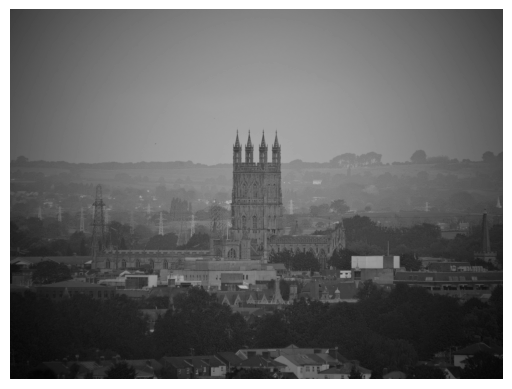

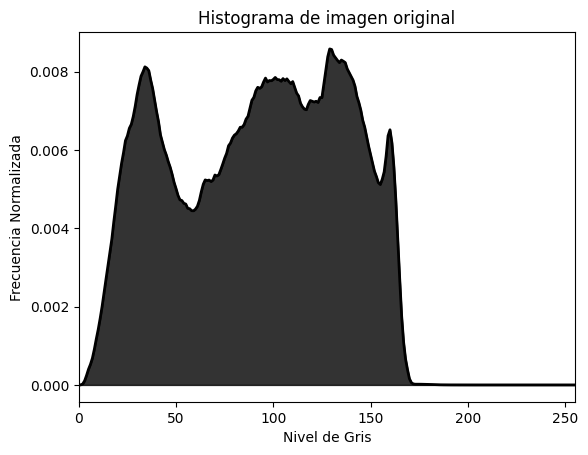

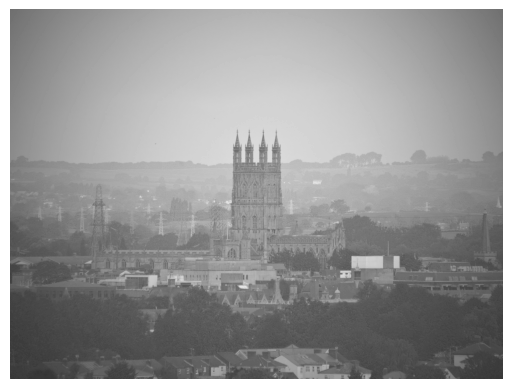

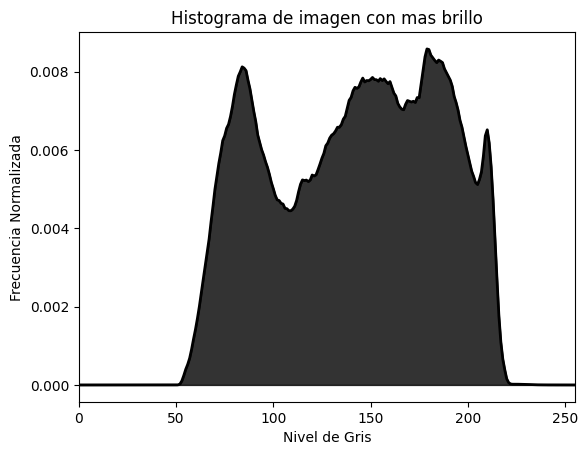

In [ ]:
# Cargamos la imagen
# image = cv2.imread('eight.tif', cv2.IMREAD_GRAYSCALE)
image = cv2.imread('cathedral.jpg', cv2.IMREAD_GRAYSCALE)

# Mostramos imagen original
show_img(image)
# Y su histograma
plot_normalized_histogram(image, name='imagen original')

# Ahora bajamos el brillo
bright = 50

image2 = image.copy().astype(int)

# Ajustamos el brillo y clipeamos
image2 = (image2+bright)
image2 = np.clip(image2, 0, 255).astype(np.uint8)

# Mostramos imagen con mas brillo
show_img(image2)
# Y su histograma
plot_normalized_histogram(image2, name='imagen con mas brillo')

Tal como se puede ver, el histograma de la imagen mantiene su forma, pero se ve desplazado hacia la derecha en este caso

## Contraste

Hay diversas formas de cambiar el contraste, pero todas llegan al mismo resultado, modificar la diferencia entre los valores de intensidad mayores y los menores. Una forma de lograrlo es mediante la ecualización de histograma, tal como se pudo ver en el ejercicio anterior.

En lo que sigue adpotamos una técnica más sencilla, denominada "contrast stretching" (https://hackernoon.com/image-processing-algorithms-adjusting-contrast-and-image-brightness-0y4y318a), donde escalamos los valores mínimos y máximos de la imagen al rango [0-255], de manera que quede abarcado todo el rango de la imagen, y con un factor que controla cuanto saturar en los extremos.

La fórmula que se aplica para el contrast stretching con el factor $F_c$ es:

$$T_c(r) = \frac{r - r_{min}}{r_{max} - r_{min}} \cdot F_c$$

In [ ]:
def contrastStretch(image, cFactor=1):
  # Copiamos la imagen
  newIm = image.copy().astype(int)

  # Aplicamos transformacion
  newIm = 255 * cFactor * (newIm-newIm.min())/(newIm.max()-newIm.min())

  # Clipeamos
  newIm = np.clip(newIm, 0, 255).astype(np.uint8)

  return newIm

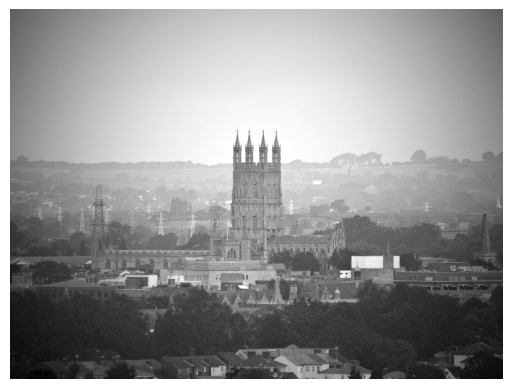

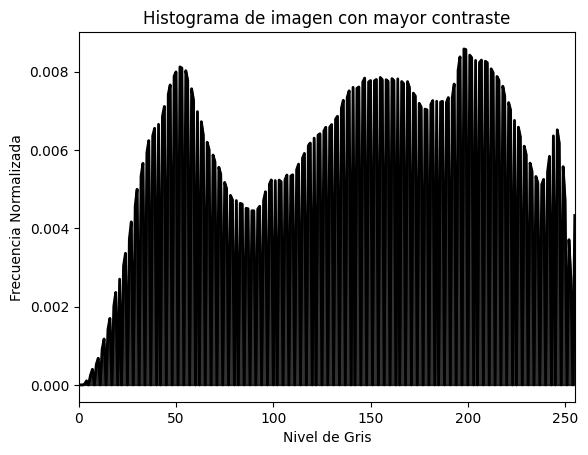

In [ ]:
image3 = contrastStretch(image, cFactor=1.2)

show_img(image3)
plot_normalized_histogram(image3, name='imagen con mayor contraste')

Se ve claramente como el histograma se expande, creando una mayor diferencia entre las intensidades menores y las mayores

# Ejercicio 7: HDR

In [ ]:
filenames = ["office_1.jpg", "office_2.jpg", "office_3.jpg", "office_4.jpg", "office_5.jpg", "office_6.jpg"]
times = np.array([ 1/30.0, 0.1, 1/3.0, 0.625, 1.3, 4.0 ], dtype=np.float32)
images = [cv2.imread(filename) for filename in filenames]

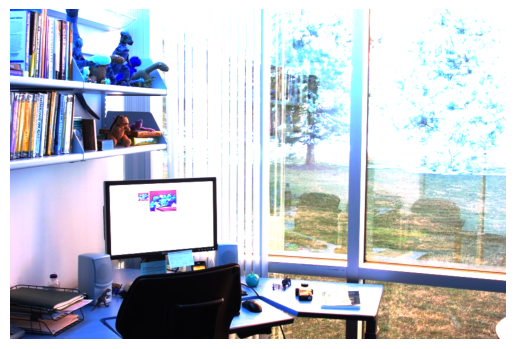

In [ ]:
# Align input images
alignMTB = cv2.createAlignMTB().process(images, images)

# Obtain Camera Response Function (CRF)
responseDebevec = cv2.createCalibrateDebevec().process(images, times)

# Merge images into an HDR linear image
hdrDebevec = cv2.createMergeDebevec().process(images, times, responseDebevec)

show_img(hdrDebevec)

Para corregir la foto decidimos aplicar la [corrección de Reinhard](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.106.8100&rep=rep1&type=pdf).

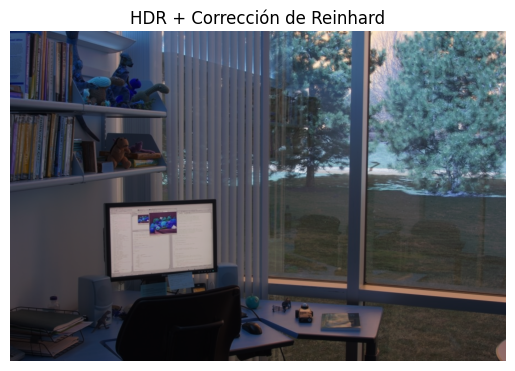

In [ ]:
# Tonemap using Reinhard's method to obtain 24-bit color image
ldrReinhard = cv2.createTonemapReinhard(1.5, 0,0,0).process(hdrDebevec)
show_img(ldrReinhard, "HDR + Corrección de Reinhard")

# Ejercicio 8: Test Gamma

Con el fotómetro alimentado y conectado a nuestra computadora ejecutamos el ```luxtest.m``` para medir el $γ$ del monitor de una de nuestras notebooks.

El resultado obtenido fue el de la siguiente imagen, en donde $γ=1.63$ lo cual resulta un resultado coherente.

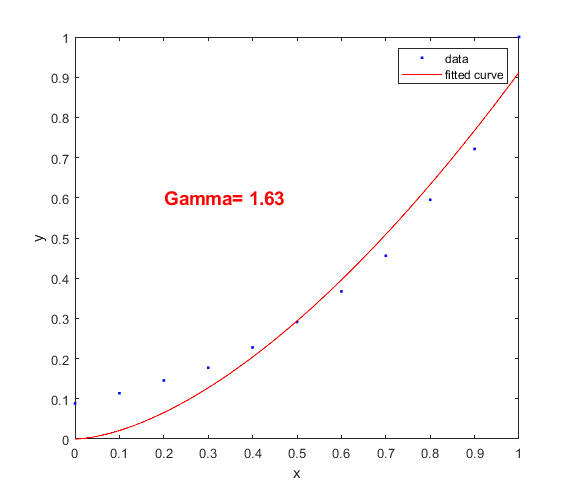